### Predicting Sales Opportunity Outcome

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import ydata_profiling
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

In [2]:
cars = pd.read_excel(r"C:\Users\jh095\OneDrive - Cummins\GAC\Project Management\data\cars.xlsx")
cars.head()

,ID,Supplies,Supplies_Sub,Region,Market,Elapsed_Days,Result,Stage_Change,Total_Days,Total_Siebel,Amount,Client_Revenue,Client_Employee,Client_Past,Competitor,Ratio_Identify,Ratio_Validate,Ratio_Qualify,Size
0,1641984,Car Accessories,Exterior Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,More than 1M,More than 25K,0 (No business),Unknown,0.69636,0.113985,0.154215,10K or less
1,1658010,Car Accessories,Exterior Accessories,Pacific,Reseller,63,Loss,2,163,163,0,250K to 500K,More than 25K,0 (No business),Unknown,0.00000,1.000000,0.000000,10K or less
2,1674737,Performance & Non-auto,Motorcycle Parts,Pacific,Reseller,24,Won,7,82,82,7750,100K or less,1K or less,0 (No business),Unknown,1.00000,0.000000,0.000000,10K or less
3,1675224,Performance & Non-auto,Shelters & RV,Midwest,Reseller,16,Loss,5,124,124,0,100K or less,1K or less,0 (No business),Known,1.00000,0.000000,0.000000,10K or less
4,1689785,Car Accessories,Exterior Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,100K or less,1K or less,0 (No business),Unknown,0.00000,0.141125,0.000000,30K to 40K


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               78025 non-null  int64  
 1   Supplies         78025 non-null  object 
 2   Supplies_Sub     78025 non-null  object 
 3   Region           78025 non-null  object 
 4   Market           78025 non-null  object 
 5   Elapsed_Days     78025 non-null  int64  
 6   Result           78025 non-null  object 
 7   Stage_Change     78025 non-null  int64  
 8   Total_Days       78025 non-null  int64  
 9   Total_Siebel     78025 non-null  int64  
 10  Amount           78025 non-null  int64  
 11  Client_Revenue   78025 non-null  object 
 12  Client_Employee  78025 non-null  object 
 13  Client_Past      78025 non-null  object 
 14  Competitor       78025 non-null  object 
 15  Ratio_Identify   78025 non-null  float64
 16  Ratio_Validate   78025 non-null  float64
 17  Ratio_Qualif

In [4]:
cars.describe()

,ID,Elapsed_Days,Stage_Change,Total_Days,Total_Siebel,Amount,Ratio_Identify,Ratio_Validate,Ratio_Qualify
count,7.802500e+04,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000
mean,7.653429e+06,43.595348,2.955732,16.728356,16.314348,91637.260750,0.203063,0.488314,0.185048
std,1.054848e+06,26.585600,1.497242,16.729593,16.562597,133161.029157,0.364985,0.448077,0.340283
min,1.641984e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.900423e+06,19.000000,2.000000,4.000000,4.000000,15000.000000,0.000000,0.000000,0.000000
50%,7.545569e+06,43.000000,3.000000,12.000000,12.000000,49000.000000,0.000000,0.448000,0.000000
75%,8.228329e+06,65.000000,3.000000,24.000000,24.000000,105099.000000,0.197225,1.000000,0.188552
max,1.009427e+07,210.000000,23.000000,208.000000,208.000000,1000000.000000,1.000000,1.000000,1.000000


In [5]:
cars.columns

Index(['ID', 'Supplies', 'Supplies_Sub', 'Region', 'Market', 'Elapsed_Days',
       'Result', 'Stage_Change', 'Total_Days', 'Total_Siebel', 'Amount',
       'Client_Revenue', 'Client_Employee', 'Client_Past', 'Competitor',
       'Ratio_Identify', 'Ratio_Validate', 'Ratio_Qualify', 'Size'],
      dtype='object')

In [6]:
cars['Total_Ratio'] = cars.apply(lambda x: x['Ratio_Identify'] + x['Ratio_Validate'] + x['Ratio_Qualify'], axis=1)

In [7]:
cars['Total_Ratio'].describe()

count    78025.000000
mean         0.876425
std          0.315026
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.007547
Name: Total_Ratio, dtype: float64

In [8]:
cars[cars['Total_Ratio'] > 1]

,ID,Supplies,Supplies_Sub,Region,Market,Elapsed_Days,Result,Stage_Change,Total_Days,Total_Siebel,Amount,Client_Revenue,Client_Employee,Client_Past,Competitor,Ratio_Identify,Ratio_Validate,Ratio_Qualify,Size,Total_Ratio
15,2228983,Car Accessories,Batteries & Accessories,Northwest,Fields Sales,79,Won,5,32,32,0,More than 1M,1K or less,0 (No business),Known,0.024845,0.456522,0.518634,10K or less,1.000001
69,4806813,Car Accessories,Exterior Accessories,Pacific,Fields Sales,70,Loss,10,106,106,462000,100K or less,1K or less,0 (No business),Known,0.130806,0.267299,0.601896,50K to 60K,1.000001
112,5047569,Car Accessories,Replacement Parts,Midwest,Fields Sales,16,Loss,6,149,149,110000,More than 1M,More than 25K,0 (No business),Known,0.081154,0.109323,0.809524,40K to 50K,1.000001
151,5175220,Car Accessories,Batteries & Accessories,Midwest,Fields Sales,67,Loss,8,92,92,150000,500K to 1M,15K to 25K,"More than 100,000",Known,0.064061,0.807818,0.128122,40K to 50K,1.000001
208,5304281,Car Accessories,Garage & Car Care,Northwest,Fields Sales,82,Loss,6,72,72,23255,500K to 1M,5K to 15K,0 (No business),Known,0.235784,0.343967,0.420250,10K to 20K,1.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75601,9562463,Car Accessories,Exterior Accessories,Northeast,Fields Sales,5,Loss,4,13,13,150000,100K or less,1K or less,0 (No business),Unknown,0.178295,0.759690,0.062016,40K to 50K,1.000001
75642,9568916,Tires & Wheels,Tires & Wheels,Southeast,Fields Sales,12,Loss,4,5,5,39999,100K or less,1K or less,0 (No business),Unknown,0.018519,0.388889,0.592593,20K to 30K,1.000001
75788,9618719,Car Accessories,Batteries & Accessories,Southwest,Fields Sales,12,Loss,4,5,5,105000,100K or less,1K or less,0 (No business),Unknown,0.702128,0.021277,0.276596,40K to 50K,1.000001
75920,9629493,Performance & Non-auto,Motorcycle Parts,Southeast,Reseller,5,Won,6,10,10,80000,100K or less,1K or less,"More than 100,000",None,0.067308,0.490385,0.442308,30K to 40K,1.000001


In [9]:
cars[cars['Total_Ratio'] > 1].shape

(471, 20)

In [10]:
cars[cars['Total_Ratio'] > 1]

,ID,Supplies,Supplies_Sub,Region,Market,Elapsed_Days,Result,Stage_Change,Total_Days,Total_Siebel,Amount,Client_Revenue,Client_Employee,Client_Past,Competitor,Ratio_Identify,Ratio_Validate,Ratio_Qualify,Size,Total_Ratio
15,2228983,Car Accessories,Batteries & Accessories,Northwest,Fields Sales,79,Won,5,32,32,0,More than 1M,1K or less,0 (No business),Known,0.024845,0.456522,0.518634,10K or less,1.000001
69,4806813,Car Accessories,Exterior Accessories,Pacific,Fields Sales,70,Loss,10,106,106,462000,100K or less,1K or less,0 (No business),Known,0.130806,0.267299,0.601896,50K to 60K,1.000001
112,5047569,Car Accessories,Replacement Parts,Midwest,Fields Sales,16,Loss,6,149,149,110000,More than 1M,More than 25K,0 (No business),Known,0.081154,0.109323,0.809524,40K to 50K,1.000001
151,5175220,Car Accessories,Batteries & Accessories,Midwest,Fields Sales,67,Loss,8,92,92,150000,500K to 1M,15K to 25K,"More than 100,000",Known,0.064061,0.807818,0.128122,40K to 50K,1.000001
208,5304281,Car Accessories,Garage & Car Care,Northwest,Fields Sales,82,Loss,6,72,72,23255,500K to 1M,5K to 15K,0 (No business),Known,0.235784,0.343967,0.420250,10K to 20K,1.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75601,9562463,Car Accessories,Exterior Accessories,Northeast,Fields Sales,5,Loss,4,13,13,150000,100K or less,1K or less,0 (No business),Unknown,0.178295,0.759690,0.062016,40K to 50K,1.000001
75642,9568916,Tires & Wheels,Tires & Wheels,Southeast,Fields Sales,12,Loss,4,5,5,39999,100K or less,1K or less,0 (No business),Unknown,0.018519,0.388889,0.592593,20K to 30K,1.000001
75788,9618719,Car Accessories,Batteries & Accessories,Southwest,Fields Sales,12,Loss,4,5,5,105000,100K or less,1K or less,0 (No business),Unknown,0.702128,0.021277,0.276596,40K to 50K,1.000001
75920,9629493,Performance & Non-auto,Motorcycle Parts,Southeast,Reseller,5,Won,6,10,10,80000,100K or less,1K or less,"More than 100,000",None,0.067308,0.490385,0.442308,30K to 40K,1.000001


In [11]:
# Only 1 entry with an extreme value.

cars[cars['Total_Ratio'] > 1.00001]

,ID,Supplies,Supplies_Sub,Region,Market,Elapsed_Days,Result,Stage_Change,Total_Days,Total_Siebel,Amount,Client_Revenue,Client_Employee,Client_Past,Competitor,Ratio_Identify,Ratio_Validate,Ratio_Qualify,Size,Total_Ratio
67605,8075767,Car Accessories,Interior Accessories,Southwest,Fields Sales,17,Loss,5,27,27,100000,100K or less,1K or less,0 (No business),Known,0.026415,0.981132,0.0,40K to 50K,1.007547


In [12]:
# Drop the row with the extreme value.

cars = cars.drop(cars[cars['Total_Ratio'] > 1.00001].index)

### Rename values in categorical columns

In [13]:
cars['Supplies'].replace(['Car Accessories', 'Performance & Non-auto', 'Tires & Wheels','Car Electronics'],
                         ['Accessories', 'Performance', 'Tires_Wheels', 'Electronics'], inplace=True)

In [14]:
cars['Supplies_Sub'].replace(['Motorcycle Parts', 'Exterior Accessories', 'Garage & Car Care', 'Shelters & RV',
                               'Batteries & Accessories', 'Replacement Parts', 'Interior Accessories', 'Towing & Hitches',
                               'Performance Parts', 'Tires & Wheels', 'Car Electronics'],
                              ['Motorcycle_Parts', 'Exterior', 'Garage_Car_Care', 'Shelters_RV', 
                               'Batteries', 'Replacement', 'Interior', 'Towing_Hitches',
                               'Performance', 'Tires_Wheels', 'Electronics'], inplace=True)

In [15]:
cars['Region'].replace('Mid-Atlantic', 'Mid_Atlantic', inplace=True)

cars['Market'].replace('Fields Sales', 'Field_Sales', inplace=True)

In [16]:
cars['Client_Revenue'].replace(['100K or less', 'More than 1M', '250K to 500K', '500K to 1M', '100K to 250K'],
                               ['Below_100K', 'Above_1M', '250K_to_500K', '500K_to_1M', '100K_to_250K'], inplace=True)

In [17]:
cars['Client_Employee'].replace(['1K or less', 'More than 25K', '5K to 15K', '1K to 5K', '15K to 25K'],
                                ['Below_1K', 'Above_25K', '5K_to_15K', '1K_to_5K', '15K_to_25K'], inplace=True)

In [18]:
cars['Size'].replace(['40K to 50K', '10K to 20K', '30K to 40K', '10K or less', '20K to 30K',
                      '50K to 60K', 'More than 60K'],
                     ['40K_to_50K', '10K_to_20K', '30K_to_40K', 'Below_10K', '20K_to_30K',
                      '50K_to_60K', 'Above_60K'], inplace=True)

In [19]:
# 'ID' column is the original index, which is not needed.
# 'Total_Ratio' column was used as a quality check and is no longer needed.

cars.drop(['ID', 'Total_Ratio'], axis=1, inplace=True)

# Exploratory Data Analysis

In [20]:

num_columns = ['Amount', 'Elapsed_Days', 'Stage_Change', 'Total_Days', 'Total_Siebel',
              'Ratio_Identify', 'Ratio_Validate', 'Ratio_Qualify']

In [21]:
cat_columns = ['Result', 'Supplies_Sub', 'Region', 'Market', 'Client_Revenue', 
               'Client_Employee', 'Client_Past', 'Competitor', 'Size']

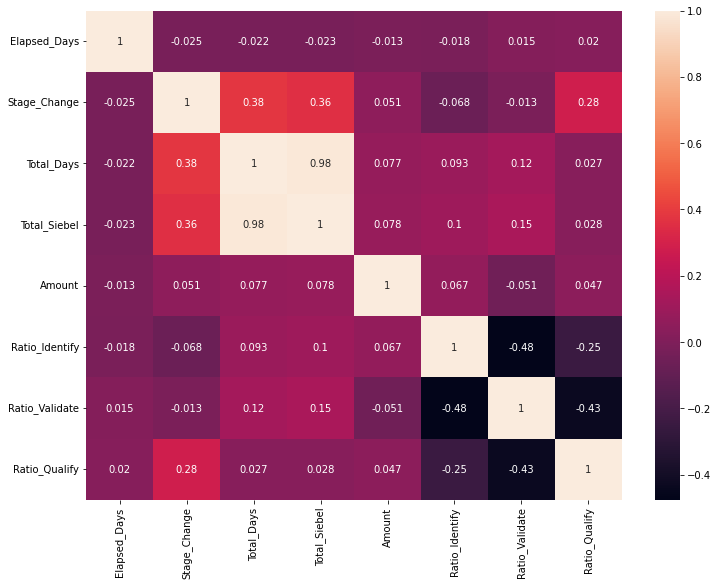

In [22]:
# Correlation between numeric columns.

cars_corr = cars.corr()

plt.subplots(figsize=(12,9))
heatmap = sns.heatmap(cars_corr, annot=True)

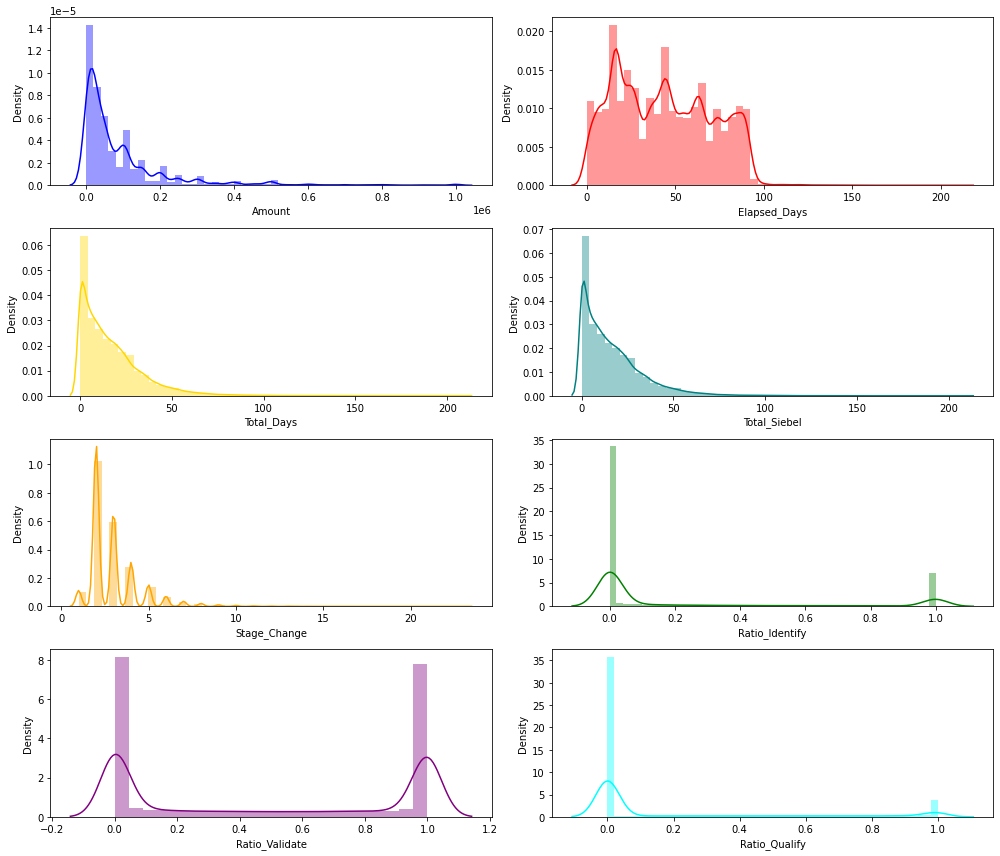

In [23]:
# Plot the distribution of numerical columns.

fig, axes = plt.subplots(4,2, figsize=(14,12))
sns.distplot(cars['Amount'], color='blue', ax=axes[0,0])
sns.distplot(cars['Elapsed_Days'], color='red', ax=axes[0,1])
sns.distplot(cars['Total_Days'], color='gold', ax=axes[1,0])
sns.distplot(cars['Total_Siebel'], color='teal', ax=axes[1,1])
sns.distplot(cars['Stage_Change'], color='orange', ax=axes[2,0])
sns.distplot(cars['Ratio_Identify'], color='green', ax=axes[2,1])
sns.distplot(cars['Ratio_Validate'], color='purple', ax=axes[3,0])
sns.distplot(cars['Ratio_Qualify'], color='cyan', ax=axes[3,1])
plt.tight_layout()

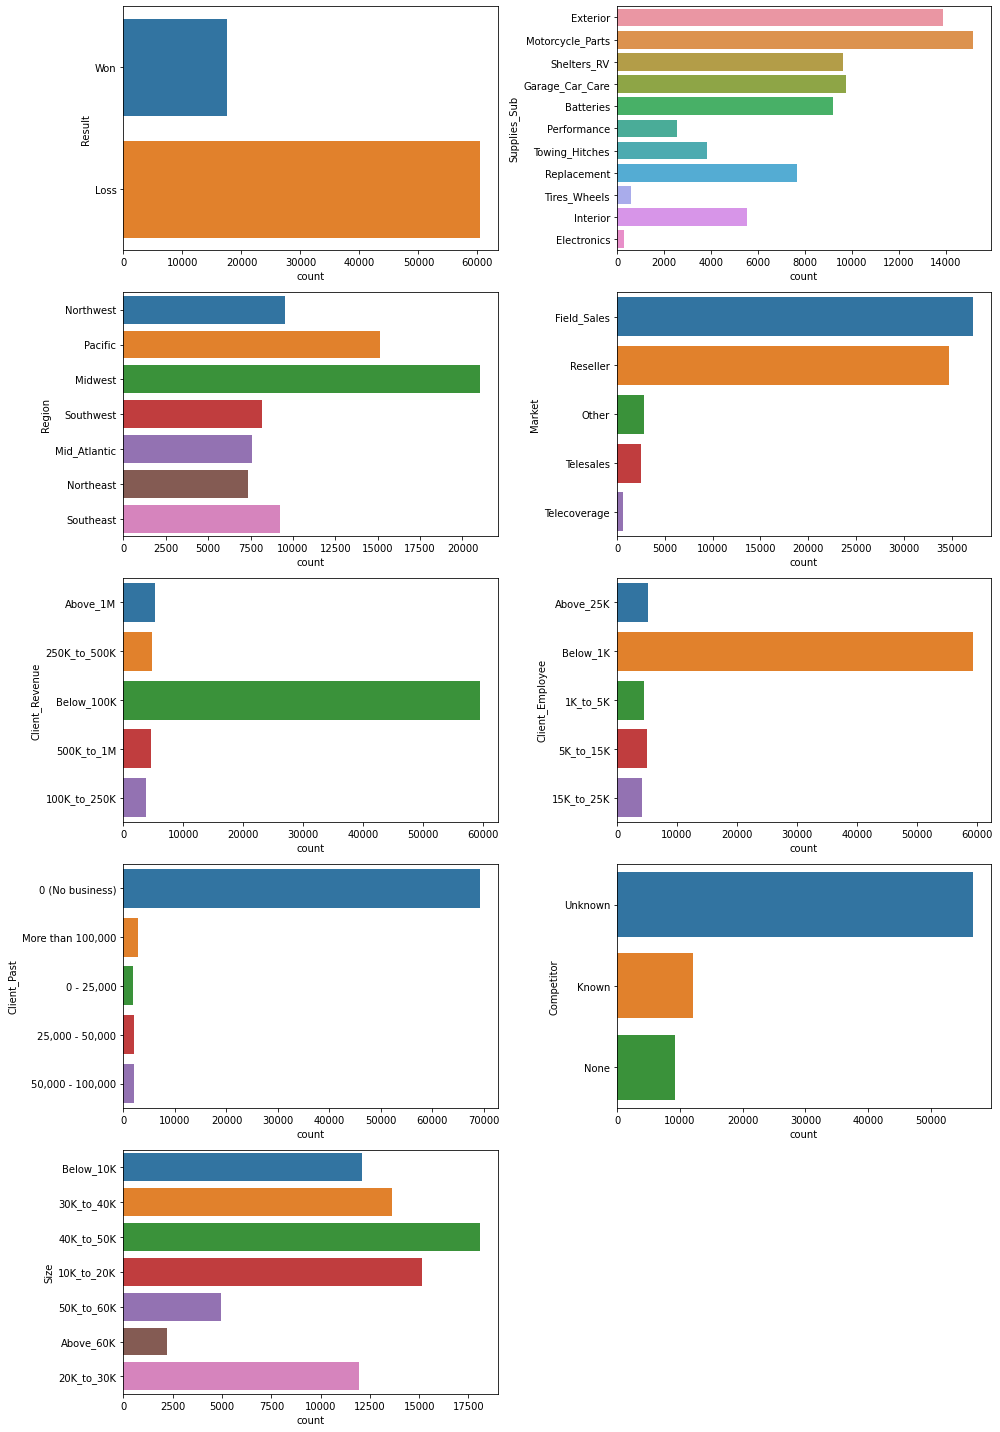

In [24]:
# Plot the distribution of categorical columns.

fig, axes = plt.subplots(5,2, figsize=(14,20))
sns.countplot(y=cars['Result'], ax=axes[0,0])
sns.countplot(y=cars['Supplies_Sub'], ax=axes[0,1])
sns.countplot(y=cars['Region'], ax=axes[1,0])
sns.countplot(y=cars['Market'], ax=axes[1,1])
sns.countplot(y=cars['Client_Revenue'], ax=axes[2,0])
sns.countplot(y=cars['Client_Employee'], ax=axes[2,1])
sns.countplot(y=cars['Client_Past'], ax=axes[3,0])
sns.countplot(y=cars['Competitor'], ax=axes[3,1])
sns.countplot(y=cars['Size'], ax=axes[4,0])
fig.delaxes(axes[4][1])
plt.tight_layout()

In [25]:
#%config InlineBackend.figure_format = 'retina'
#sns.set_style('whitegrid')

## Feature Engineering

In [26]:
# Change values of 'Result' column to binary.
# Reduce the number of categories in 'Client_Past' column to 2 (0 = new client, 1 = existing client).

cars['Result'] = cars['Result'].map(lambda x: 0 if x == 'Loss' else 1)
cars['Client_Past'] = cars['Client_Past'].map(lambda x: 0 if x == '0 (No business)' else 1)

In [27]:
# 'Supplies_Sub' column provides a clearer picture compared to 'Supplies' column

cars.groupby('Supplies').Supplies_Sub.value_counts()

Supplies      Supplies_Sub    
Accessories   Exterior            13876
              Garage_Car_Care      9733
              Batteries            9192
              Replacement          7666
              Interior             5524
              Towing_Hitches       3818
Electronics   Electronics           281
Performance   Motorcycle_Parts    15174
              Shelters_RV          9606
              Performance          2545
Tires_Wheels  Tires_Wheels          609
Name: Supplies_Sub, dtype: int64

In [28]:
# Drop 'Total_Siebel' column due to high correlation with 'Total_Days' column.
# Drop 'Supplies' column since 'Supplies_Sub' is more detailed.

cars2 = cars.drop(['Total_Siebel', 'Supplies'], axis=1)

In [29]:
# Create dummy variables for categorical columns.

cat_dummy = pd.get_dummies(cars2[cat_columns], drop_first=True)
print(cat_dummy.shape)
cat_dummy.head()

(78024, 38)


,Result,Client_Past,Supplies_Sub_Electronics,Supplies_Sub_Exterior,Supplies_Sub_Garage_Car_Care,Supplies_Sub_Interior,Supplies_Sub_Motorcycle_Parts,Supplies_Sub_Performance,Supplies_Sub_Replacement,Supplies_Sub_Shelters_RV,...,Client_Employee_Above_25K,Client_Employee_Below_1K,Competitor_None,Competitor_Unknown,Size_20K_to_30K,Size_30K_to_40K,Size_40K_to_50K,Size_50K_to_60K,Size_Above_60K,Size_Below_10K
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [30]:
# Combine original dataset with new dummy variables.
# Drop old categorical columns.

print(cars2.shape)
cars2.drop(cat_columns, axis=1, inplace=True)
print(cars2.shape)
cars2 = pd.concat([cars2, cat_dummy], axis=1)
print(cars2.shape)
cars2.head()

(78024, 16)
(78024, 7)
(78024, 45)


,Elapsed_Days,Stage_Change,Total_Days,Amount,Ratio_Identify,Ratio_Validate,Ratio_Qualify,Result,Client_Past,Supplies_Sub_Electronics,...,Client_Employee_Above_25K,Client_Employee_Below_1K,Competitor_None,Competitor_Unknown,Size_20K_to_30K,Size_30K_to_40K,Size_40K_to_50K,Size_50K_to_60K,Size_Above_60K,Size_Below_10K
0,76,13,104,0,0.69636,0.113985,0.154215,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,63,2,163,0,0.00000,1.000000,0.000000,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,24,7,82,7750,1.00000,0.000000,0.000000,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,16,5,124,0,1.00000,0.000000,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,69,11,91,69756,0.00000,0.141125,0.000000,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [31]:
cars2.head()

,Elapsed_Days,Stage_Change,Total_Days,Amount,Ratio_Identify,Ratio_Validate,Ratio_Qualify,Result,Client_Past,Supplies_Sub_Electronics,...,Client_Employee_Above_25K,Client_Employee_Below_1K,Competitor_None,Competitor_Unknown,Size_20K_to_30K,Size_30K_to_40K,Size_40K_to_50K,Size_50K_to_60K,Size_Above_60K,Size_Below_10K
0,76,13,104,0,0.69636,0.113985,0.154215,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,63,2,163,0,0.00000,1.000000,0.000000,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,24,7,82,7750,1.00000,0.000000,0.000000,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,16,5,124,0,1.00000,0.000000,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,69,11,91,69756,0.00000,0.141125,0.000000,0,0,0,...,0,1,0,1,0,1,0,0,0,0


#### Prepare target/predictor variables and train/test sets

To prepare our data, we will split it into two parts: a training set and a testing set. We will use the training set to train our models, and we will use the testing set to evaluate how well our models perform on unseen data. We will also use a technique called 5-fold cross validation to train our models.

We noticed that the target column has an imbalance, with the majority class being overrepresented. This is a concern, and we will address it in the next section.

Our models will need to achieve an accuracy score that is higher than the baseline of 0.77408

In [32]:
# Set target y and predictor X.
# Calculate overall baseline accuracy.

y = cars2['Result']
X = cars2.drop('Result', axis=1)

print(y.value_counts())

baseline = 1 - np.mean(y)
baseline

0    60397
1    17627
Name: Result, dtype: int64


0.774082333640931

In [33]:
# Split train/test sets.

from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
print('Training data:')
print(X_train.shape)
print(y_train.shape)
print('------------------')
print('Testing data:')
print(X_test.shape)
print(y_test.shape)

Training data:
(54616, 44)
(54616,)
------------------
Testing data:
(23408, 44)
(23408,)


In [34]:
# Calculate baseline accuracy for both training and testing sets.

print('Training set:')
print(y_train.value_counts())
print()
print('Training baseline accuracy: ' + str(1 - np.mean(y_train)))
print('-------------------')
print('Testing set:')
print(y_test.value_counts())
print()
print('Testing baseline accuracy: ' + str(1 - np.mean(y_test)))

Training set:
0    42215
1    12401
Name: Result, dtype: int64

Training baseline accuracy: 0.7729419950197745
-------------------
Testing set:
0    18182
1     5226
Name: Result, dtype: int64

Testing baseline accuracy: 0.7767429938482571


In [35]:
# Standardize X.

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

Next, we will use the SelectFromModel function from scikit-learn to perform feature selection. This function will use a Random Forest Classifier to identify the features that are most important for predicting the opportunity outcome.

The results show that only 9 of the 44 features in our dataset were selected. This means that these 9 features are the most important for predicting the opportunity outcome.

In [36]:
# Perform feature selection.

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier())

print('Shape of dataset before feature selection: ' + str(X_train.shape))
select.fit(Xs_train, y_train)
Xs_train = select.transform(Xs_train)
Xs_test = select.transform(Xs_test)
print('Shape of dataset after feature selection: ' + str(Xs_train.shape))

Shape of dataset before feature selection: (54616, 44)
Shape of dataset after feature selection: (54616, 9)


In [37]:
# Check with features were selected.

feature_support = pd.DataFrame({'feature': X_train.columns,
                           'support': select.get_support()})

feature_support.sort_values('support', inplace=True, ascending=False)
feature_support.head(10)

,feature,support
0,Elapsed_Days,True
5,Ratio_Validate,True
1,Stage_Change,True
7,Client_Past,True
6,Ratio_Qualify,True
25,Market_Reseller,True
4,Ratio_Identify,True
3,Amount,True
2,Total_Days,True
27,Market_Telesales,False


#### Data Imbalance

In order to address the issue of class imbalance, we intend to employ two distinct techniques provided by the Python package 'imblearn' to rebalance the data in our training dataset.

RandomOverSampler: This technique involves randomly oversampling the minority class (1) with replacement. Through this process, we will augment the number of instances in the minority class to reach 42,215 from the original count of 12,401.

RandomUnderSampler: In contrast, this method randomly undersamples the majority class (0) with replacement. Consequently, the number of majority class instances will be reduced to 12,401 from the initial count of 42,215.

By applying these techniques, we will generate three distinct training datasets: the default dataset, the oversampled dataset, and the undersampled dataset

In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=100)
Xs_train_rus, y_train_rus = rus.fit_resample(Xs_train, y_train)

print('Dataset before undersampling:')
print(y_train.value_counts())
print('------------------------------')
print('Dataset after undersampling:')
print(Xs_train_rus.shape)
print(y_train_rus.shape)

Dataset before undersampling:
0    42215
1    12401
Name: Result, dtype: int64
------------------------------
Dataset after undersampling:
(24802, 9)
(24802,)


#### Model 9 K-Nearest Neighbours with Undersampling

In [42]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_range = range(1, 21)
knn_params = {'n_neighbors': k_range, 'weights': ['uniform', 'distance']}

In [43]:
# Perform Grid Search with undersampled dataset to identify best parameters.

knn_params = {'n_neighbors':k_range,
              'weights':['uniform','distance']}

knn_rus_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1, n_jobs=-1)
knn_rus_grid.fit(Xs_train_rus, y_train_rus)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [44]:
# View grid search results.

print(knn_rus_grid.best_score_)
print(knn_rus_grid.best_params_)
print(knn_rus_grid.best_estimator_)

0.8250540668829774
{'n_neighbors': 16, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=16, weights='distance')


In [45]:
knn9_rus = KNeighborsClassifier(n_neighbors=15, weights='distance')

knn9_rus.fit(Xs_train_rus, y_train_rus)
knn9_rus_train_score = knn9_rus.score(Xs_train_rus, y_train_rus)
knn9_rus_cv_score = np.mean(cross_val_score(knn9_rus, Xs_train_rus, y_train_rus, cv=5))
knn9_rus_test_score = knn9_rus.score(Xs_test, y_test)
y9_pred_rus = knn9_rus.predict(Xs_test)

y9_proba = knn9_rus.predict_proba(Xs_test)
y9_proba = [p[1] for p in y9_proba]
knn9_roc_score = roc_auc_score(y_test, y9_proba)

print('training score:', knn9_rus_train_score)
print('training CV score:', knn9_rus_cv_score)
print('testing score:', knn9_rus_test_score)
print('ROC score:', knn9_roc_score)
print('------------------------------------------------------')
print(classification_report(y_test, y9_pred_rus))
print('------------------------------------------------------')
print(y_test, y9_pred_rus)

training score: 0.9989516974437546
training CV score: 0.8242476396538159
testing score: 0.8192925495557074
ROC score: 0.9002945112148572
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.82      0.88     18182
           1       0.56      0.83      0.67      5226

    accuracy                           0.82     23408
   macro avg       0.75      0.82      0.77     23408
weighted avg       0.86      0.82      0.83     23408

------------------------------------------------------
74044    1
32703    1
47318    0
53702    1
15673    0
        ..
51076    0
47428    0
45773    0
28493    0
45055    0
Name: Result, Length: 23408, dtype: int64 [1 0 0 ... 0 1 0]


In [46]:
import pickle

path = r"C:\Users\jh095\OneDrive - Cummins\GAC\Project Management\code\deployment\model_dep.pkl"

# create an iterator object with write permission - model.pkl

with open(path, 'wb') as files:
    pickle.dump(knn9_rus, files)

In [ ]:
# import streamlit as st
# import joblib

In [ ]:
# model = joblib.load(r'C:\Users\jh095\OneDrive - Cummins\GAC\Project Management\code\deployment\model.pkl')

 

# st.title('Sales Opportunity Prediction Deployment')
# st.write('This is a Streamlit web app to demonstrate deploying a Sales Opportunity Prediction model.')